In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("atharvasoundankar/global-cybersecurity-threats-2015-2024")

print("Path to dataset files:", path)

100%|██████████| 47.0k/47.0k [00:00<00:00, 385kB/s]

Extracting files...
Path to dataset files: C:\Users\leona\.cache\kagglehub\datasets\atharvasoundankar\global-cybersecurity-threats-2015-2024\versions\1


In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv(r'C:\Users\leona\Desktop\01 - Projeto Python\Global-Cybersecurity-Threats\Global_Cybersecurity_Threats_2015-2024.csv')
df

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68
...,...,...,...,...,...,...,...,...,...,...
2995,UK,2021,Ransomware,Government,51.42,190694,Unknown,Social Engineering,Firewall,52
2996,Brazil,2023,SQL Injection,Telecommunications,30.28,892843,Hacker Group,Zero-day,VPN,26
2997,Brazil,2017,SQL Injection,IT,32.97,734737,Nation-state,Weak Passwords,AI-based Detection,30
2998,UK,2022,SQL Injection,IT,32.17,379954,Insider,Unpatched Software,Firewall,9


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


In [9]:
df.describe()

,Year,Financial Loss (in Million $),Number of Affected Users,Incident Resolution Time (in Hours)
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2019.570333,50.492970,504684.136333,36.476000
std,2.857932,28.791415,289944.084972,20.570768
min,2015.000000,0.500000,424.000000,1.000000
25%,2017.000000,25.757500,255805.250000,19.000000
50%,2020.000000,50.795000,504513.000000,37.000000
75%,2022.000000,75.630000,758088.500000,55.000000
max,2024.000000,99.990000,999635.000000,72.000000


In [10]:
df.describe(include = "object")

,Country,Attack Type,Target Industry,Attack Source,Security Vulnerability Type,Defense Mechanism Used
count,3000,3000,3000,3000,3000,3000
unique,10,6,7,4,4,5
top,UK,DDoS,IT,Nation-state,Zero-day,Antivirus
freq,321,531,478,794,785,628


In [11]:
cat_cols = []
for col in df.columns:
    if df[col].dtypes == "object":
        cat_cols.append(col)

for i in cat_cols:
    print(df[i].value_counts())
    print("-"*30)

Country
UK           321
Brazil       310
India        308
France       305
Japan        305
Australia    297
Russia       295
Germany      291
USA          287
China        281
Name: count, dtype: int64
------------------------------
Attack Type
DDoS                 531
Phishing             529
SQL Injection        503
Ransomware           493
Malware              485
Man-in-the-Middle    459
Name: count, dtype: int64
------------------------------
Target Industry
IT                    478
Banking               445
Healthcare            429
Retail                423
Education             419
Telecommunications    403
Government            403
Name: count, dtype: int64
------------------------------
Attack Source
Nation-state    794
Unknown         768
Insider         752
Hacker Group    686
Name: count, dtype: int64
------------------------------
Security Vulnerability Type
Zero-day              785
Social Engineering    747
Unpatched Software    738
Weak Passwords        730
Name: co

In [12]:
le = LabelEncoder()
df_temp = df.copy()
for i in cat_cols:
    df_temp[i] = le.fit_transform(df_temp[i])
df_temp.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,2,2019,3,1,80.53,773169,0,1,4,63
1,2,2019,4,5,62.19,295961,0,1,3,71
2,5,2017,2,4,38.65,605895,0,2,4,20
3,8,2024,4,6,41.44,659320,2,0,0,7
4,4,2018,2,4,74.41,810682,1,0,4,68


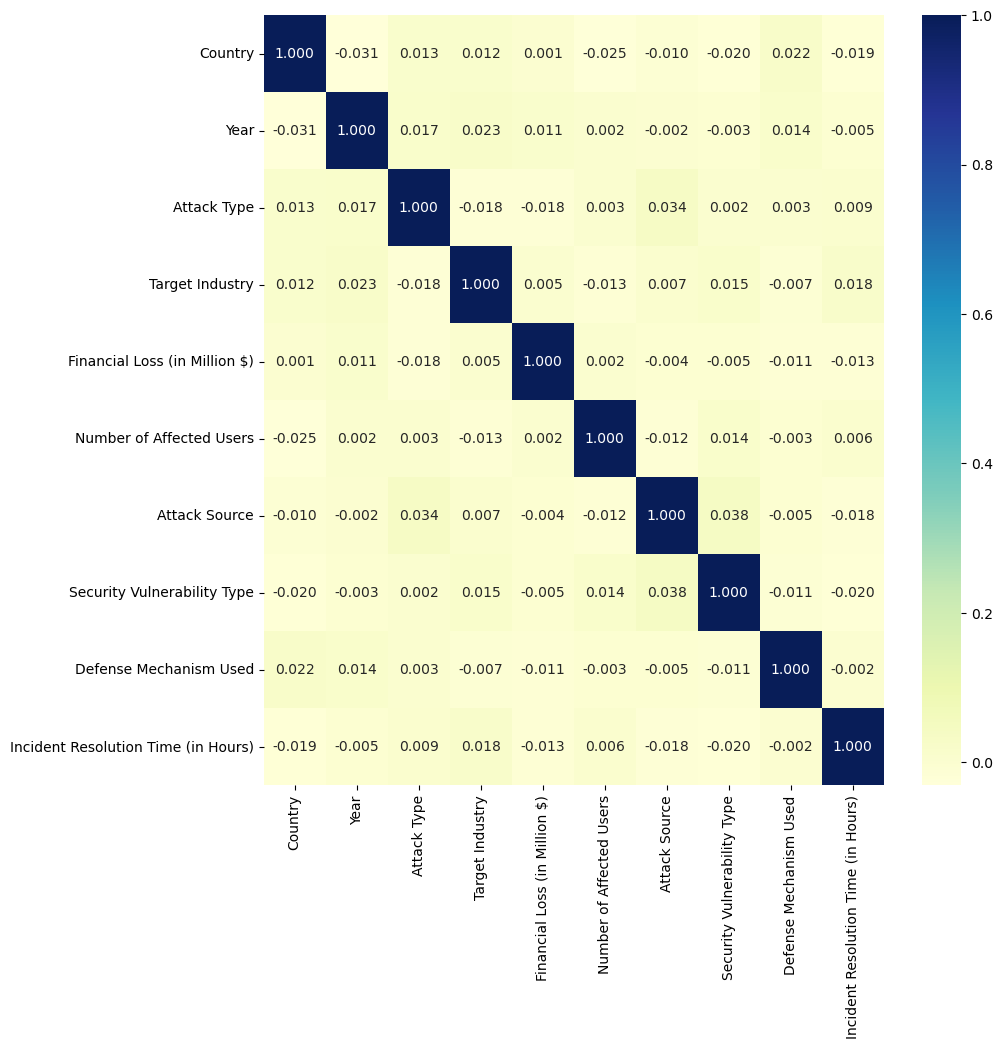

In [15]:
df_temp_corr = df_temp.corr()
plt.figure(figsize = (10, 10))
sns.heatmap(df_temp_corr, fmt = ".3f", annot = True, cmap = "YlGnBu")
plt.show()

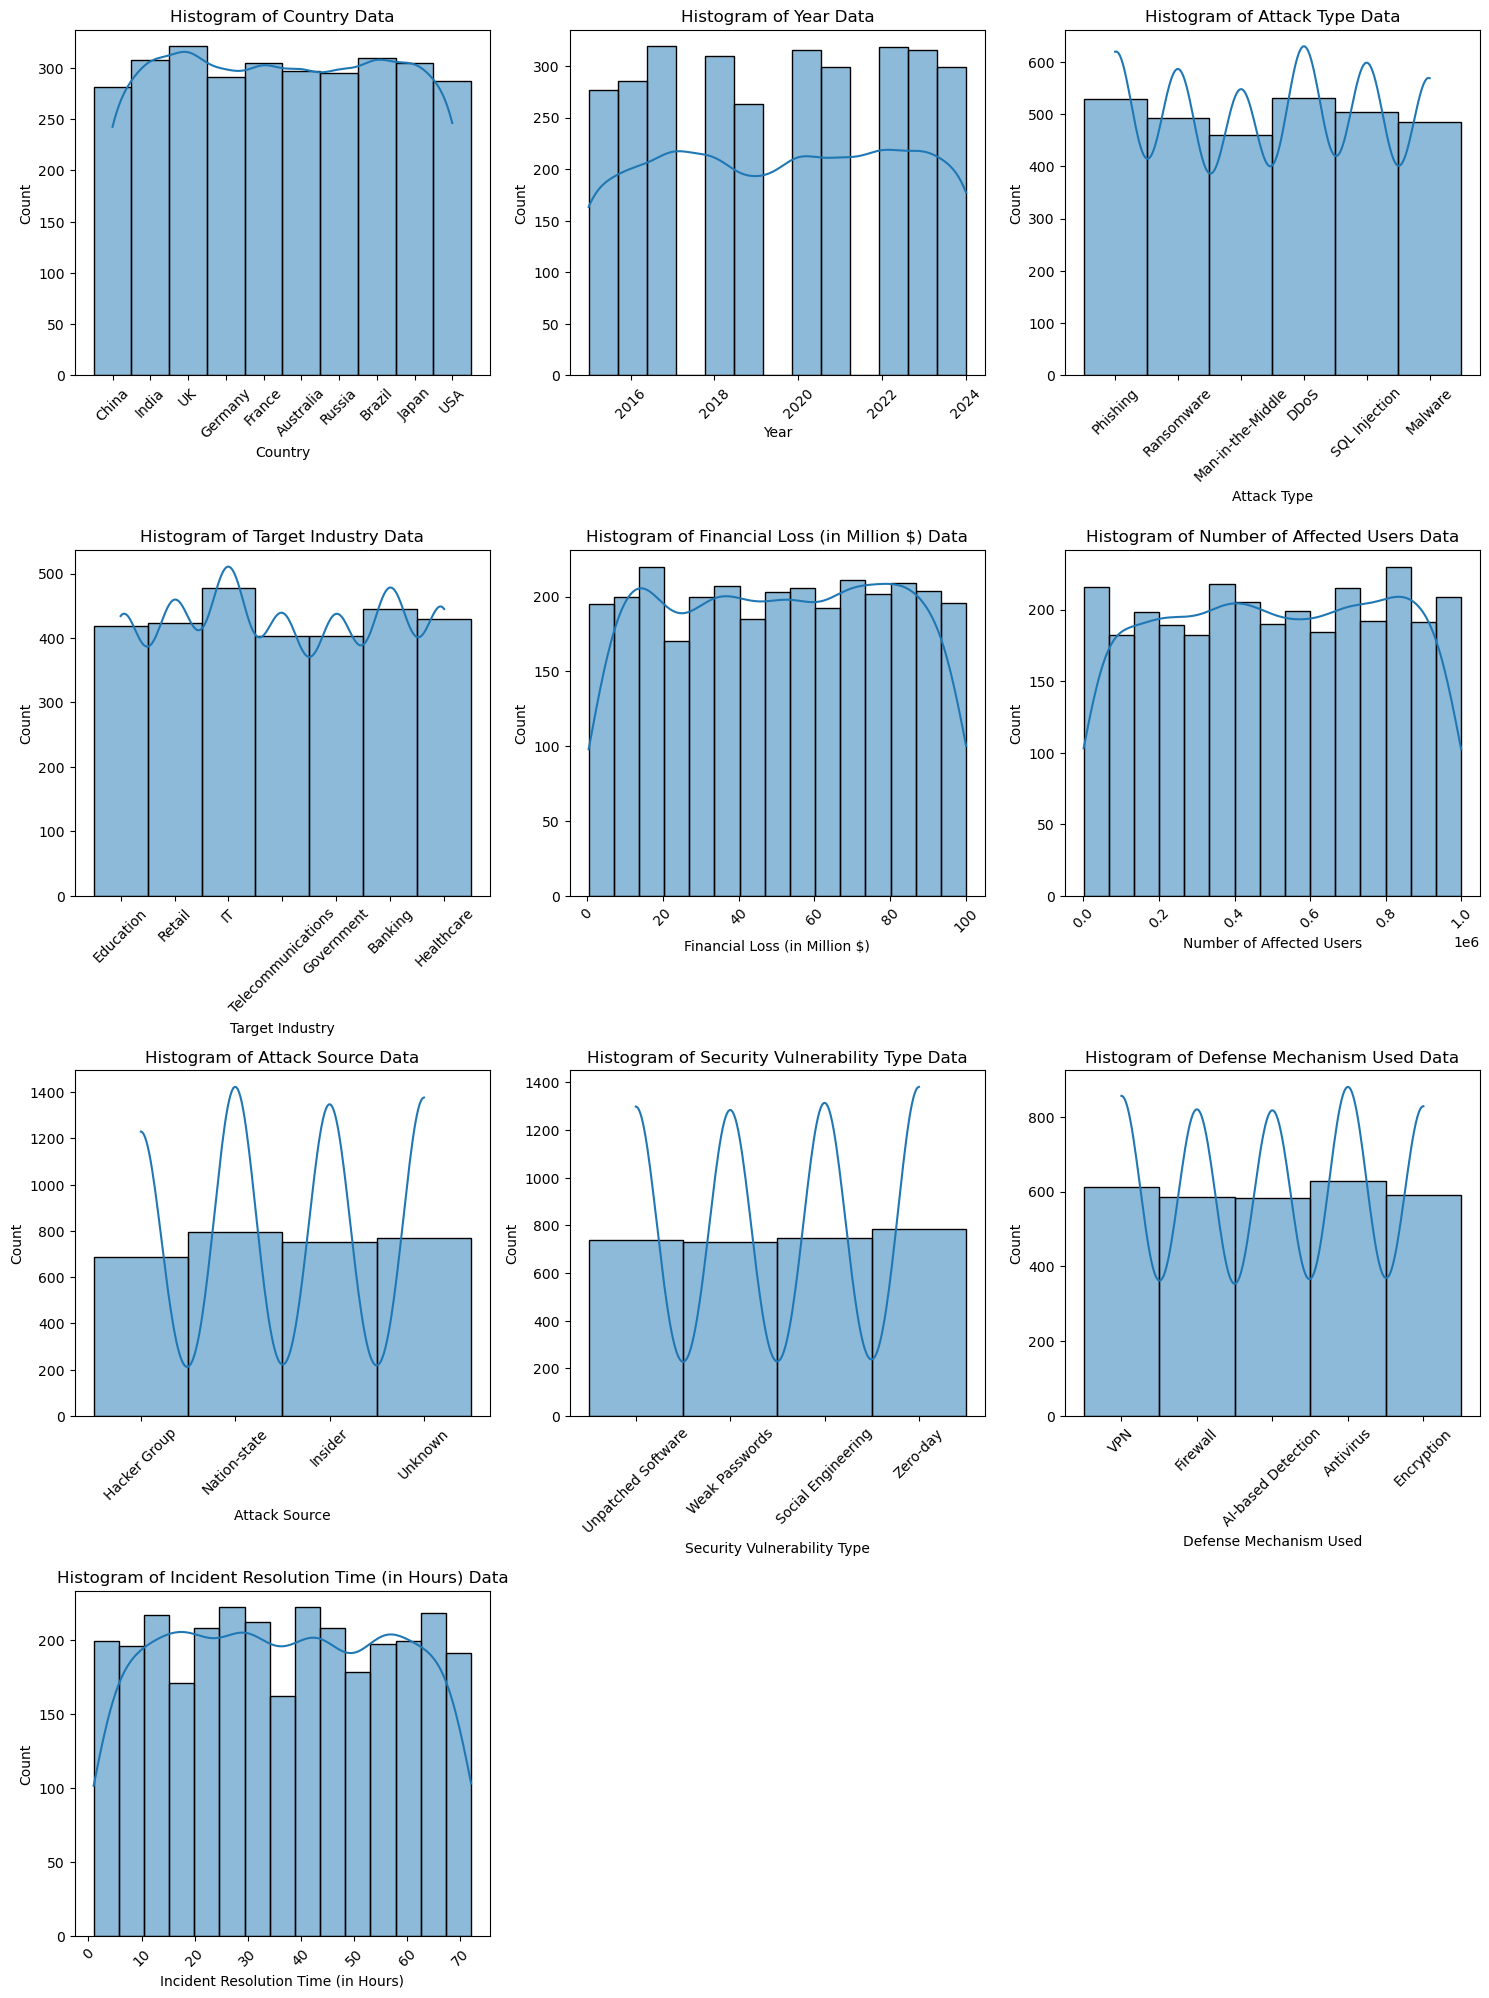

In [17]:
plt.figure(figsize = (15, 20))
for i, col in enumerate(df.columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(x = df[col], kde = True) 
    plt.title(f"Histogram of {col} Data")
    plt.tight_layout()
    plt.xticks(rotation = 45)
    plt.plot()

In [18]:
df1 = df.copy()
df.drop(["Year", "Financial Loss (in Million $)", "Number of Affected Users", "Incident Resolution Time (in Hours)"], axis = 1, inplace = True)
df = pd.concat([df, df1[["Year", "Number of Affected Users", "Incident Resolution Time (in Hours)", "Financial Loss (in Million $)"]]], axis = 1)
df.head()

,Country,Attack Type,Target Industry,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Year,Number of Affected Users,Incident Resolution Time (in Hours),Financial Loss (in Million $)
0,China,Phishing,Education,Hacker Group,Unpatched Software,VPN,2019,773169,63,80.53
1,China,Ransomware,Retail,Hacker Group,Unpatched Software,Firewall,2019,295961,71,62.19
2,India,Man-in-the-Middle,IT,Hacker Group,Weak Passwords,VPN,2017,605895,20,38.65
3,UK,Ransomware,Telecommunications,Nation-state,Social Engineering,AI-based Detection,2024,659320,7,41.44
4,Germany,Man-in-the-Middle,IT,Insider,Social Engineering,VPN,2018,810682,68,74.41


In [ ]:
df2 = df.copy()
df.drop("Year", axis = 1, inplace = True)
df = pd.concat([df2["Year"], df], axis = 1)
df.head()

,Year,Country,Attack Type,Target Industry,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Number of Affected Users,Incident Resolution Time (in Hours),Financial Loss (in Million $)
0,2019,China,Phishing,Education,Hacker Group,Unpatched Software,VPN,773169,63,80.53
1,2019,China,Ransomware,Retail,Hacker Group,Unpatched Software,Firewall,295961,71,62.19
2,2017,India,Man-in-the-Middle,IT,Hacker Group,Weak Passwords,VPN,605895,20,38.65
3,2024,UK,Ransomware,Telecommunications,Nation-state,Social Engineering,AI-based Detection,659320,7,41.44
4,2018,Germany,Man-in-the-Middle,IT,Insider,Social Engineering,VPN,810682,68,74.41


In [21]:
def create_pivot_tables(df, column_name):
    df = df.pivot_table(index = "Year",
                        columns = cat_cols,
                        values = column_name,
                        aggfunc = "mean").unstack().reset_index()
    df = df.rename(columns = {0: f"Avg {column_name}"})
    return df

dfs = {}
column_names = df.columns[7:-1]
for i, column_name in enumerate(column_names):
    df_name = f"df_{i+1}"
    dfs[df_name] = create_pivot_tables(df, column_name)

In [22]:
df_merged = df.copy()

for column_name in column_names:
    if column_name in df_merged.columns:
        df_merged = df_merged.drop(column_name, axis=1)

for df_name, df_pivot in dfs.items():
    df_merged = pd.merge(df_merged, df_pivot,
                         on=['Year', 'Country', 'Attack Type', 'Target Industry',
                             'Attack Source', 'Security Vulnerability Type', 'Defense Mechanism Used'],
                         how='left')

df_merged

,Year,Country,Attack Type,Target Industry,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Financial Loss (in Million $),Avg Number of Affected Users,Avg Incident Resolution Time (in Hours)
0,2019,China,Phishing,Education,Hacker Group,Unpatched Software,VPN,80.53,773169.0,63.0
1,2019,China,Ransomware,Retail,Hacker Group,Unpatched Software,Firewall,62.19,295961.0,71.0
2,2017,India,Man-in-the-Middle,IT,Hacker Group,Weak Passwords,VPN,38.65,605895.0,20.0
3,2024,UK,Ransomware,Telecommunications,Nation-state,Social Engineering,AI-based Detection,41.44,659320.0,7.0
4,2018,Germany,Man-in-the-Middle,IT,Insider,Social Engineering,VPN,74.41,810682.0,68.0
...,...,...,...,...,...,...,...,...,...,...
2995,2021,UK,Ransomware,Government,Unknown,Social Engineering,Firewall,51.42,190694.0,52.0
2996,2023,Brazil,SQL Injection,Telecommunications,Hacker Group,Zero-day,VPN,30.28,892843.0,26.0
2997,2017,Brazil,SQL Injection,IT,Nation-state,Weak Passwords,AI-based Detection,32.97,734737.0,30.0
2998,2022,UK,SQL Injection,IT,Insider,Unpatched Software,Firewall,32.17,379954.0,9.0


In [23]:
for i in cat_cols:
    df_merged[i] = le.fit_transform(df_merged[i])
df_merged

,Year,Country,Attack Type,Target Industry,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Financial Loss (in Million $),Avg Number of Affected Users,Avg Incident Resolution Time (in Hours)
0,2019,2,3,1,0,1,4,80.53,773169.0,63.0
1,2019,2,4,5,0,1,3,62.19,295961.0,71.0
2,2017,5,2,4,0,2,4,38.65,605895.0,20.0
3,2024,8,4,6,2,0,0,41.44,659320.0,7.0
4,2018,4,2,4,1,0,4,74.41,810682.0,68.0
...,...,...,...,...,...,...,...,...,...,...
2995,2021,8,4,2,3,0,3,51.42,190694.0,52.0
2996,2023,1,5,6,0,3,4,30.28,892843.0,26.0
2997,2017,1,5,4,2,2,0,32.97,734737.0,30.0
2998,2022,8,5,4,1,1,3,32.17,379954.0,9.0


In [24]:
df_merged.drop("Financial Loss (in Million $)", axis = 1, inplace = True)
df_merged.head()

,Year,Country,Attack Type,Target Industry,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Avg Number of Affected Users,Avg Incident Resolution Time (in Hours)
0,2019,2,3,1,0,1,4,773169.0,63.0
1,2019,2,4,5,0,1,3,295961.0,71.0
2,2017,5,2,4,0,2,4,605895.0,20.0
3,2024,8,4,6,2,0,0,659320.0,7.0
4,2018,4,2,4,1,0,4,810682.0,68.0


In [25]:
X = df_merged.iloc[:, :]
y = df_merged.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [26]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
y_xgbr = xgbr.predict(X_test)

mean_absolute_error(y_test, y_xgbr)

0.003017850054634942